# Logistic Regression for Identifying Depression Among Students

# Overview
In this task, you will use Logistic Regression to predict whether a student is experiencing depression based on different factors such as academic pressure, sleep habits, and financial stress. You will go through the full machine learning process, from exploring the data to training and evaluating a model. You are also encouraged to create visualizations to better understand the data and support your analysis.

## Dataset
We will use the Student Depression Dataset (good timing after mid term exam I guess).

### Features:
- **Gender**: Male/Female
- **Age**: Student’s age
- **City**: City where the student lives
- **Academic Pressure**: Level of academic stress
- **Work Pressure**: Level of work-related stress
- **CGPA**: Student’s academic performance
- **Study Satisfaction**: How satisfied the student is with their studies
- **Job Satisfaction**: Satisfaction with a job (if applicable)
- **Sleep Duration**: Sleep hours category (e.g., "Less than 5 hours", "5-6 hours")
- **Dietary Habits**: Eating habits (e.g., Healthy, Moderate)
- **Degree**: The degree the student is pursuing
- **Suicidal Thoughts**: Whether the student has had suicidal thoughts (Yes/No)
- **Work/Study Hours**: Hours spent working or studying daily
- **Financial Stress**: Level of financial pressure
- **Family History of Mental Illness**: Whether the student has a family history of mental illness (Yes/No)
- **Depression**: (Target variable: 1 = Has depression, 0 = No depression)

## Tasks
### **Use the df DataFrame from the cell below for all tasks.**
### Task 1 – Explore the Data
    Understand the dataset and find interesting patterns :
        - Use basic pandas functions to check the data.
        - Look for missing values, outliers, and patterns in the features.
        - Create visualizations such as heatmap, histograms, bar charts, scatter plots etc. to explore relationships between different features and depression.

### Task 2 – Data Preprocessing
    Clean and prepare the data for modeling : 
        - Handle missing values (e.g., filling or removing them). 
        - Convert categorical variables into numbers using encoding. 
        - Normalize or standardize numerical features if needed.
        - Explain why you made certain preprocessing choices.

### Task 3 – Train the Model
    Train a Logistic Regression model to predict depression : 
        - Split the data into training and testing sets.
        - Train a Logistic Regression model using scikit-learn. Look at the different parameters in scikit learn libraries ant try to change some of them (only if you can understand them).
        - Make predictions on the test data.

### Task 4 – Evaluate the Model
    Measure how well the model performs : 
        - Calculate accuracy, precision, recall, and F1-score.
        - Create a confusion matrix to see how often the model makes correct and incorrect predictions.
        - Plot an ROC curve to analyze model performance.
        - Think on how we could analyse predicted probabilities

#### Some documentation 

[Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
[Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
(There are many different plots and possible analysis to do with Seaborn. Navigate by yourself and feel free to do some insighful analysis)

[Imputing values](https://scikit-learn.org/stable/modules/impute.html)

[scikit-learn preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html)

[Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Student Depression Dataset.csv")

df = df.drop(columns=['id'])

df.head(10)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
5,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
6,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
7,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,Less than 5 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,0
8,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,12.0,3.0,No,1
9,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1


### Task 1

#### City

In [67]:
df.sample(10)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27212,Male,20.0,Ghaziabad,Student,1.0,0.0,5.74,3.0,0.0,Less than 5 hours,Healthy,Class 12,No,10.0,2.0,Yes,0
26118,Female,34.0,Ahmedabad,Student,4.0,0.0,8.95,4.0,0.0,5-6 hours,Moderate,BA,Yes,8.0,5.0,Yes,1
20435,Female,27.0,Vasai-Virar,Student,3.0,0.0,7.46,5.0,0.0,7-8 hours,Moderate,BHM,Yes,10.0,2.0,No,0
13031,Male,25.0,Rajkot,Student,3.0,0.0,7.53,4.0,0.0,Less than 5 hours,Moderate,B.Ed,No,0.0,4.0,No,0
5186,Female,20.0,Jaipur,Student,5.0,0.0,6.35,3.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,8.0,4.0,No,1
9988,Female,21.0,Surat,Student,1.0,0.0,5.10,3.0,0.0,5-6 hours,Healthy,B.Arch,Yes,11.0,2.0,No,0
9398,Female,30.0,Vasai-Virar,Student,5.0,0.0,6.78,2.0,0.0,Less than 5 hours,Unhealthy,BSc,Yes,9.0,4.0,No,1
24170,Male,24.0,Surat,Student,5.0,0.0,6.35,4.0,0.0,Less than 5 hours,Moderate,B.Com,Yes,12.0,5.0,Yes,1
3424,Male,32.0,Varanasi,Student,3.0,0.0,6.88,3.0,0.0,5-6 hours,Unhealthy,M.Ed,No,0.0,2.0,No,0
1333,Male,18.0,Varanasi,Student,1.0,0.0,6.21,3.0,0.0,5-6 hours,Healthy,Class 12,No,7.0,2.0,No,0


In [68]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [69]:
df.groupby(by=['City'])['Depression'].sum()[:10]

City
3.0            1
Agra         585
Ahmedabad    640
Bangalore    467
Bhavna         2
Bhopal       579
Chennai      528
City           1
Delhi        468
Faridabad    271
Name: Depression, dtype: int64

There is some corellation between the city and the number of depressed students as we can clearly see that some cities have up to 800+ students with depression, while others have a mere 1-2

In [70]:
print(*df['City'].unique()[:10], sep='\n')
print('Number of cities: ', len(df['City'].unique()))

Visakhapatnam
Bangalore
Srinagar
Varanasi
Jaipur
Pune
Thane
Chennai
Nagpur
Nashik
Number of cities:  52


In [71]:
df.loc[df['City']=='3.0']

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
7021,Female,21.0,3.0,Student,3.0,0.0,8.69,4.0,0.0,7-8 hours,Unhealthy,BCA,Yes,11.0,5.0,No,1


Some weird data - probably have to remove it

In [72]:
df = df[df['City'] != '3.0']
df.loc[df['City']=='3.0']

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


#### Gender

In [73]:
by_gender = df.groupby('Gender')['Depression'].sum().reset_index()
by_gender

,Gender,Depression
0,Female,7220
1,Male,9115


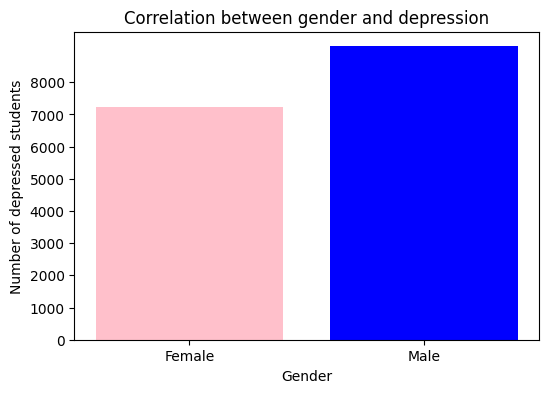

In [74]:
plt.figure(figsize=(6, 4))
plt.bar(by_gender['Gender'], by_gender['Depression'], color=['pink', 'blue'])
plt.xlabel('Gender')
plt.yticks(list(range(0, 9000, 1000)))
plt.ylabel('Number of depressed students')
plt.title('Correlation between gender and depression')
plt.show()

![](https://i.sstatic.net/ScRR6m.jpg)   
Guys struggle with depression more, according to this data

#### Age

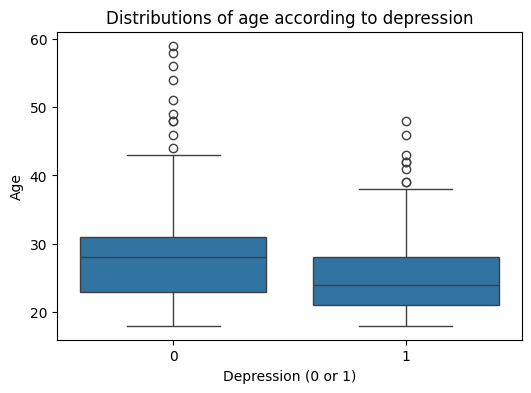

In [75]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(x='Depression', y='Age', data=df)
plt.xlabel('Depression (0 or 1)')
plt.ylabel('Age')
plt.title('Distributions of age according to depression')
plt.show()

#### Other things to consider

<Axes: >

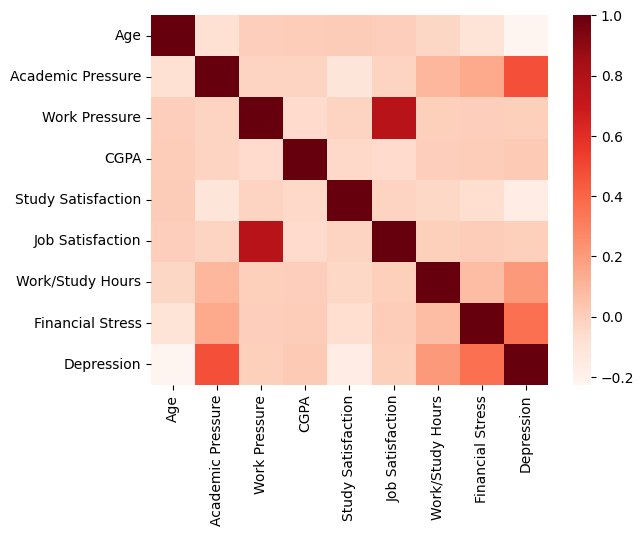

In [76]:
import seaborn as sns

correlation = df[['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']].corr()
sns.heatmap(correlation, cmap="Reds")

We should probably focus on **financial and academic stress**

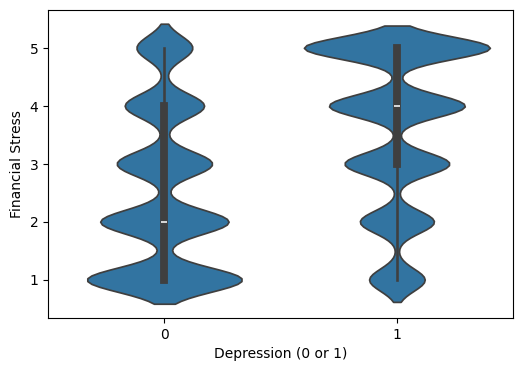

In [77]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Depression', y='Financial Stress', data=df)
plt.xlabel('Depression (0 or 1)')
plt.ylabel('Financial Stress')
plt.show()

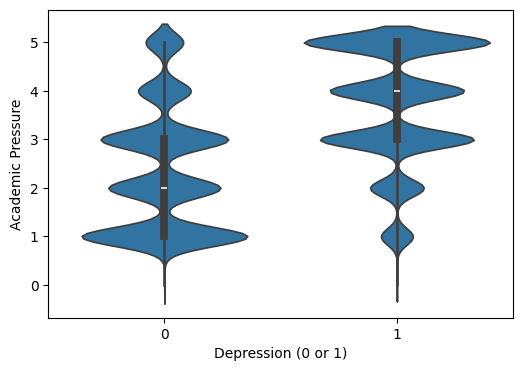

In [78]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Depression', y='Academic Pressure', data=df)
plt.xlabel('Depression (0 or 1)')
plt.ylabel('Academic Pressure')
plt.show()

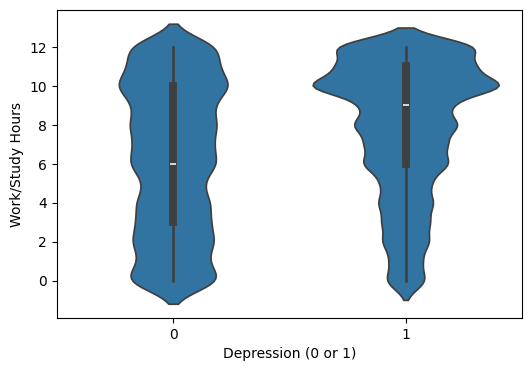

In [85]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Depression', y='Work/Study Hours', data=df)
plt.xlabel('Depression (0 or 1)')
plt.ylabel('Work/Study Hours')
plt.show()

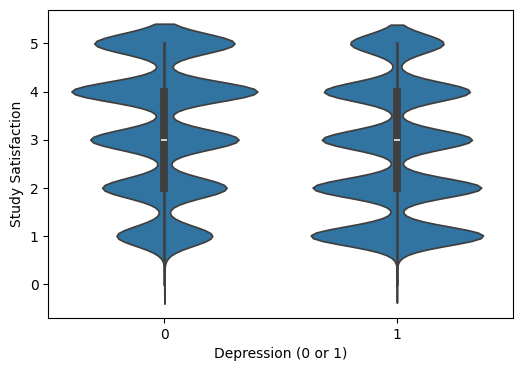

In [86]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Depression', y='Study Satisfaction', data=df)
plt.xlabel('Depression (0 or 1)')
plt.ylabel('Study Satisfaction')
plt.show()

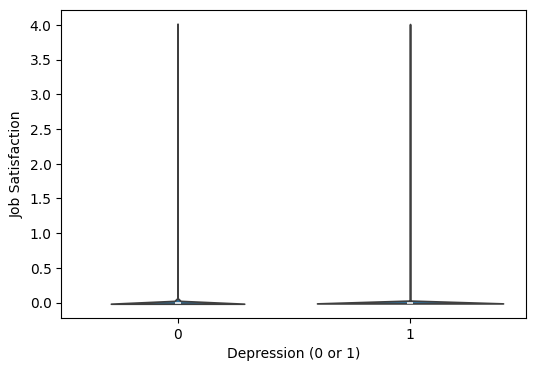

In [87]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Depression', y='Job Satisfaction', data=df)
plt.xlabel('Depression (0 or 1)')
plt.ylabel('Job Satisfaction')
plt.show()

In [113]:
df['Job Satisfaction'].describe()

count    27900.000000
mean         0.000681
std          0.044395
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: Job Satisfaction, dtype: float64

We can clearly see that
- Individuals with depression (1) tend to have higher academic pressure and financial stress than those without it.
- The peak density for depressed individuals is around 3-5, whereas non-depressed individuals have more variation.
- There is still some overlap, meaning not everyone with high academic pressure and severe financial stress experiences depression, and vice versa.

#### Other things to consider

In [79]:
df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [80]:
by_sleep = df.groupby('Sleep Duration')['Depression'].sum().reset_index()
by_diet = df.groupby('Dietary Habits')['Depression'].sum().reset_index()
by_thoughts = df.groupby('Have you ever had suicidal thoughts ?')['Depression'].sum().reset_index()
by_family_history = df.groupby('Family History of Mental Illness')['Depression'].sum().reset_index()



by_sleep.iloc[2], by_sleep.iloc[0] = by_sleep.iloc[0], by_sleep.iloc[2]
by_sleep.iloc[1], by_sleep.iloc[2] = by_sleep.iloc[2], by_sleep.iloc[1]
by_sleep

,Sleep Duration,Depression
0,Less than 5 hours,5361
1,5-6 hours,3517
2,7-8 hours,4370
3,More than 8 hours,3078
4,Others,9


In [81]:
by_diet.iloc[2], by_diet.iloc[3] = by_diet.iloc[3], by_diet.iloc[2]


In [82]:
by_diet

,Dietary Habits,Depression
0,Healthy,3473
1,Moderate,5558
2,Unhealthy,7296
3,Others,8


Text(0.5, 1.0, 'Family history of Mental Illness')

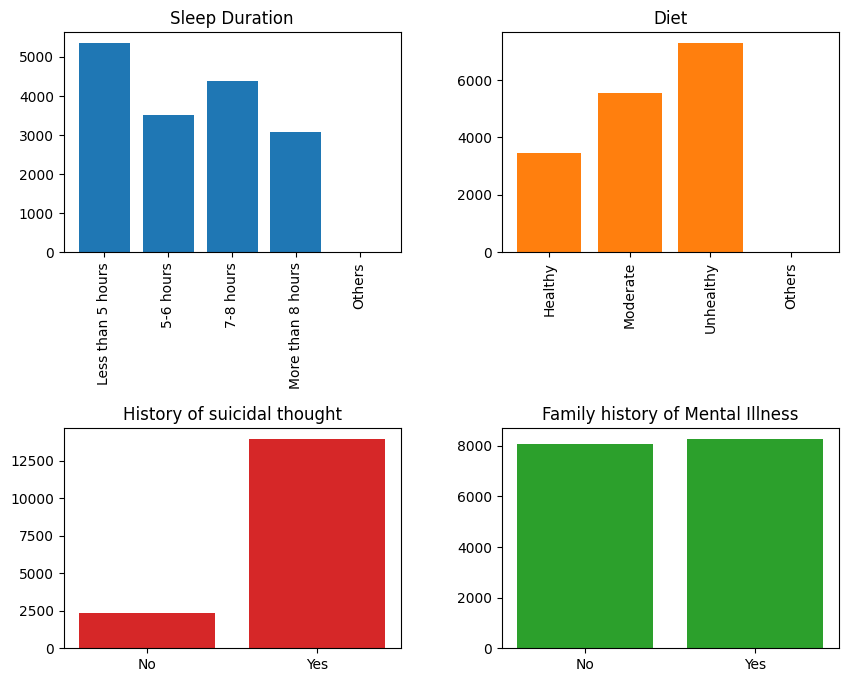

In [83]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

plt.subplots_adjust(hspace=0.8, wspace=0.3)

axs[0, 0].bar(by_sleep['Sleep Duration'], by_sleep['Depression'])
axs[0, 0].set_title('Sleep Duration')
axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 1].bar(by_diet['Dietary Habits'], by_diet['Depression'], color='tab:orange')
axs[0, 1].set_title('Diet')
axs[0, 1].tick_params(axis='x', rotation=90)
axs[1, 0].bar(by_thoughts['Have you ever had suicidal thoughts ?'], by_thoughts['Depression'], color='tab:red')
axs[1, 0].set_title('History of suicidal thought')
axs[1, 1].bar(by_family_history['Family History of Mental Illness'], by_family_history['Depression'], color='tab:green')
axs[1, 1].set_title('Family history of Mental Illness')



I think, we should include fields for history of suicidal thoughts and diet into our feature matrix as we can see a clear relationship between them and the nubmer of students struggling with depression

### Task 2 - Data processing

In [149]:
X = df[['Gender', 'Academic Pressure', 'Financial Stress', 'Dietary Habits', 'Have you ever had suicidal thoughts ?']]
X.head(5)

,Gender,Academic Pressure,Financial Stress,Dietary Habits,Have you ever had suicidal thoughts ?
0,Male,5.0,1.0,Healthy,Yes
1,Female,2.0,2.0,Moderate,No
2,Male,3.0,1.0,Healthy,No
3,Female,3.0,5.0,Moderate,Yes
4,Female,4.0,1.0,Moderate,Yes


In [150]:
X = pd.get_dummies(X, columns=['Gender'])
X['Gender_Female'] = X['Gender_Female'].astype(int)
X['Gender_Male'] = X['Gender_Male'].astype(int)
X.head()

,Academic Pressure,Financial Stress,Dietary Habits,Have you ever had suicidal thoughts ?,Gender_Female,Gender_Male
0,5.0,1.0,Healthy,Yes,0,1
1,2.0,2.0,Moderate,No,1,0
2,3.0,1.0,Healthy,No,0,1
3,3.0,5.0,Moderate,Yes,1,0
4,4.0,1.0,Moderate,Yes,1,0


In [151]:
X = X.rename(columns={'Have you ever had suicidal thoughts ?' : 'Suicidal_Thoughts', 
                  'Academic Pressure' : 'Academic_Pressure',
                  'Financial Stress' : 'Financial_Stress',
                  'Dietary Habits' : 'Diet'})

In [152]:
X['Suicidal_Thoughts'] = X['Suicidal_Thoughts'].map({'Yes': 1, 'No': 0})
X.head(5)

,Academic_Pressure,Financial_Stress,Diet,Suicidal_Thoughts,Gender_Female,Gender_Male
0,5.0,1.0,Healthy,1,0,1
1,2.0,2.0,Moderate,0,1,0
2,3.0,1.0,Healthy,0,0,1
3,3.0,5.0,Moderate,1,1,0
4,4.0,1.0,Moderate,1,1,0


In [153]:
X = pd.get_dummies(X, columns=['Diet'], dtype=int)
X

,Academic_Pressure,Financial_Stress,Suicidal_Thoughts,Gender_Female,Gender_Male,Diet_Healthy,Diet_Moderate,Diet_Others,Diet_Unhealthy
0,5.0,1.0,1,0,1,1,0,0,0
1,2.0,2.0,0,1,0,0,1,0,0
2,3.0,1.0,0,0,1,1,0,0,0
3,3.0,5.0,1,1,0,0,1,0,0
4,4.0,1.0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
27896,5.0,1.0,1,1,0,0,0,0,1
27897,2.0,3.0,0,0,1,1,0,0,0
27898,3.0,2.0,0,0,1,0,0,0,1
27899,5.0,5.0,1,1,0,1,0,0,0


In [154]:
X = X.drop(columns =['Diet_Others'])
X

,Academic_Pressure,Financial_Stress,Suicidal_Thoughts,Gender_Female,Gender_Male,Diet_Healthy,Diet_Moderate,Diet_Unhealthy
0,5.0,1.0,1,0,1,1,0,0
1,2.0,2.0,0,1,0,0,1,0
2,3.0,1.0,0,0,1,1,0,0
3,3.0,5.0,1,1,0,0,1,0
4,4.0,1.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
27896,5.0,1.0,1,1,0,0,0,1
27897,2.0,3.0,0,0,1,1,0,0
27898,3.0,2.0,0,0,1,0,0,1
27899,5.0,5.0,1,1,0,1,0,0


### Task 3

In [155]:
np.argwhere(np.isnan(X))

array([[ 4458,     1],
       [13595,     1],
       [19265,     1]])

In [156]:
X['Financial_Stress'] = X['Financial_Stress'].fillna(X['Financial_Stress'].mean())

In [157]:
np.argwhere(np.isnan(X))

array([], shape=(0, 2), dtype=int64)

In [158]:
X = np.array(X)
y = np.array(df['Depression'])

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [160]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))